In [0]:
#importing Libarries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
plt.style.use('ggplot')

In [0]:
#Deep Learning, with tensorflow and keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [0]:
#Accesing to my Google Drive Account to take the Dataset
# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


# Fake News

In [0]:
#Fake News Dataset
ATT_FILE= "/gdrive/My Drive/TFM/Fake.csv" 

In [0]:
fake = pd.read_csv(ATT_FILE,sep=',')
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [0]:
#Counting by Subjects 
for key,count in fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


In [0]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

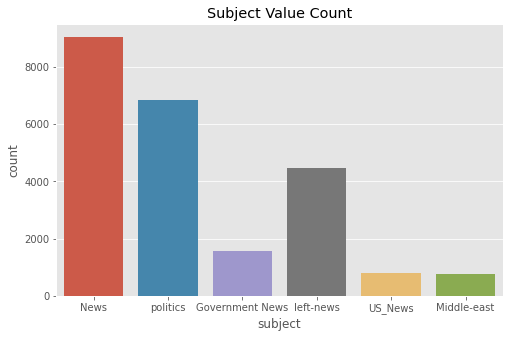

In [0]:
plt.figure(figsize=(8,5))
sns.countplot("subject", data=fake)
plt.title('Subject Value Count')
plt.show()

## Word Cloud

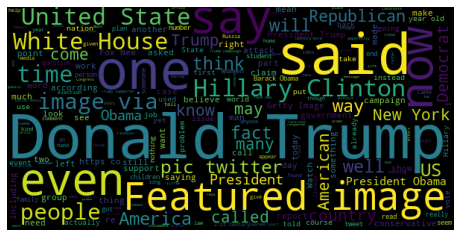

In [0]:
#WordCloudg
import matplotlib.pylab as plt
allwords = ' '.join([fk for fk in fake['text']])
wordcloud = WordCloud(width=600, height=300, random_state=21, max_font_size=119).generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Real News Dataset

In [0]:
#Fake News Dataset
att =  "/gdrive/My Drive/TFM/True.csv" 

In [0]:
real = pd.read_csv(att, sep=',')
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [0]:
real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

Text(0.5, 1.0, 'Subject Value Count')

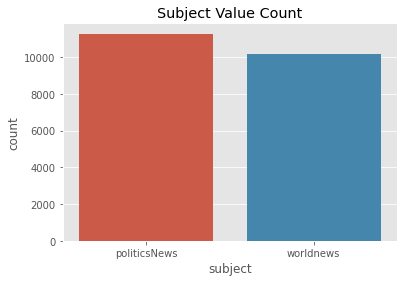

In [0]:
sns.countplot('subject',data=real)
plt.title('Subject Value Count')

In [0]:
#First Creating list of index that do not have publication part
unknown_publishers = []
for index,row in enumerate(real.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        #if no text part is present, following will give error
        record[1]
        #if len of piblication part is greater than 260
        #following will give error, ensuring no text having "-" in between is counted
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [0]:
#Thus we have list of indices where publisher is not mentioned
#lets check
real.iloc[unknown_publishers].text
#true, they do not have text like "WASHINGTON (Reuters)"

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [0]:
#Seperating Publication info, from actual text
publisher = []
tmp_text = []
for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        #Add unknown of publisher not mentioned
        tmp_text.append(row)
        
        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [0]:
#Replace existing text column with new text
#add seperate column for publication info
real["publisher"] = publisher
real["text"] = tmp_text

del publisher, tmp_text, record, unknown_publishers

In [0]:
real.tail(30)

,title,text,subject,date,publisher
21387,Former Libyan prime minister freed after abduc...,Former Libyan Prime Minister Ali Zeidan has b...,worldnews,"August 23, 2017",TRIPOLI (Reuters)
21388,Britain outlines plans to break free of Europe...,Britain on Wednesday outlined several escape ...,worldnews,"August 22, 2017",LONDON (Reuters)
21389,"Trump must be respected as U.S. president, say...",Chancellor Angela Merkel said on Wednesday Do...,worldnews,"August 23, 2017",BERLIN (Reuters)
21390,Pakistan rejects role of 'scapegoat for U.S. f...,Pakistan has rejected U.S. criticism of its e...,worldnews,"August 23, 2017","KARACHI, Pakistan (Reuters)"
21391,Romanian president opposes plans for judicial ...,Romania s justice minister proposed a signifi...,worldnews,"August 23, 2017",BUCHAREST (Reuters)
21392,"Iran, Saudi Arabia to exchange diplomatic visi...",Iran and Saudi Arabia will exchange diplomati...,worldnews,"August 23, 2017",BEIRUT (Reuters)
21393,Danish police identify torso as missing submar...,Police on Wednesday identified a headless fem...,worldnews,"August 23, 2017",COPENHAGEN (Reuters)
21394,"Typhoon batters Hong Kong and south China, thr...","Typhoon Hato, a maximum category 10 storm, sl...",worldnews,"August 22, 2017",HONG KONG (Reuters)
21395,Poland to allocate additional $55 bllion on de...,Poland will allocate an additional 200 billio...,worldnews,"August 23, 2017",WARSAW (Reuters)
21396,Pro-Houthi fighters call powerful Yemen ally '...,Fighters loyal to the armed Houthi movement o...,worldnews,"August 23, 2017",DUBAI (Reuters)


In [0]:
#checking for rows with empty text like row:8970
[index for index,text in enumerate(real.text.values) if str(text).strip() == '']
#seems only one :)

[8970]

In [0]:
#dropping this record
real = real.drop(8970, axis=0)

In [0]:
# checking for the same in fake news
empty_fake_index = [index for index,text in enumerate(fake.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_fake_index)}")
fake.iloc[empty_fake_index].tail()

No of empty rows: 630


,title,text,subject,date
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015"


In [0]:
#Getting Total Rows
print(f"Total Records:\t{real.shape[0]}")

#Counting by Subjects 
for key,count in real.subject.value_counts().iteritems():
  print(f"{key}:\t{count}")

Total Records:	21416
politicsNews:	11271
worldnews:	10145


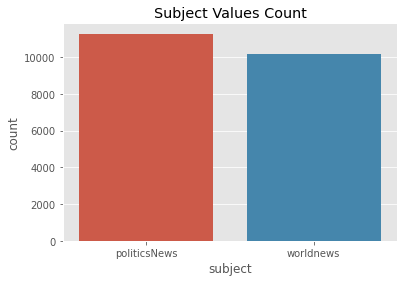

In [0]:
plt.title('Subject Values Count')
sns.countplot(x="subject", data=real)
plt.show()

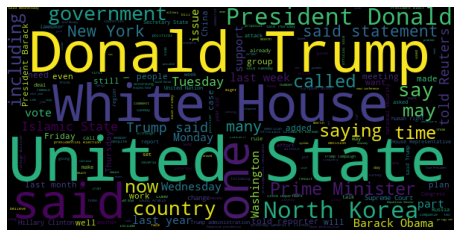

In [0]:
#Word Cloud

import matplotlib.pylab as plt
allwords = ' '.join([rl for rl in real['text']])
wordcloud = WordCloud(width=600, height=300, random_state=21, max_font_size=119).generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Processing Text


In [0]:
# Adding class Information
real["class"] = 1
fake["class"] = 0

In [0]:
#Combining Title and Text
real["text"] = real["title"] + " " + real["text"]
fake["text"] = fake["title"] + " " + fake["text"]

In [0]:
# Subject is diffrent for real and fake thus dropping it
# Aldo dropping Date, title and Publication Info of real
real = real.drop(["subject", "date","title",  "publisher"], axis=1)
fake = fake.drop(["subject", "date", "title"], axis=1)

In [0]:
#Combining both into new dataframe
data = real.append(fake, ignore_index=True)
del real, fake

In [0]:
data.head()

,text,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [0]:
def rumorLabel(value):
  if value == 1:
    return 'No Rumor'
  else:
    return 'Rumor'

In [0]:
data['ClassLabel'] = data['class'].apply(rumorLabel)
data

,text,class,ClassLabel
0,"As U.S. budget fight looms, Republicans flip t...",1,No Rumor
1,U.S. military to accept transgender recruits o...,1,No Rumor
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,No Rumor
3,FBI Russia probe helped by Australian diplomat...,1,No Rumor
4,Trump wants Postal Service to charge 'much mor...,1,No Rumor
...,...,...,...
44892,McPain: John McCain Furious That Iran Treated ...,0,Rumor
44893,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0,Rumor
44894,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0,Rumor
44895,How to Blow $700 Million: Al Jazeera America F...,0,Rumor


In [0]:
data['ClassLabel'].value_counts()

Rumor       23481
No Rumor    21416
Name: ClassLabel, dtype: int64

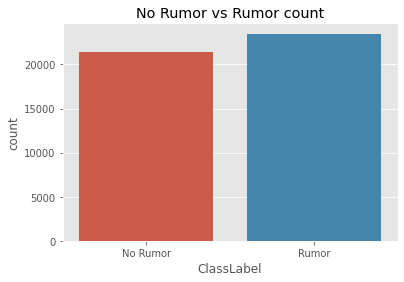

In [0]:

sns.countplot(x='ClassLabel', data=data)
plt.title('No Rumor vs Rumor count')
plt.show()

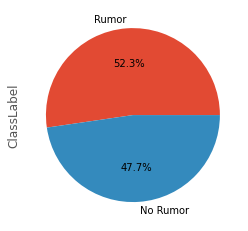

In [0]:
plot = data['ClassLabel'].value_counts().plot.pie(subplots=True, figsize=(7, 4),autopct='%1.1f%%')

In [0]:
data = data.drop(columns=['ClassLabel'])
data

,text,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
44892,McPain: John McCain Furious That Iran Treated ...,0
44893,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
44894,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
44895,How to Blow $700 Million: Al Jazeera America F...,0


In [0]:
nltk.download('stopwords')
nltk.download('punkt')
y = data["class"].values
#Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in data["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

del data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
print(stop_words)

{'all', 'about', 'myself', "wasn't", 'own', 'further', 'didn', 'a', 'shan', "you're", 'an', "wouldn't", 'them', 'isn', "shouldn't", "mustn't", 'until', 'than', 'are', 'just', 'during', 'll', 'haven', 'once', 'other', 'were', 'but', "couldn't", 'whom', 'here', 'can', 'because', 'with', "should've", 'more', 's', 'these', 'won', 'having', 'not', "hadn't", 'being', 'o', 'y', 'where', 'those', 'no', 'off', 're', 'again', 'is', 'am', 'then', 'our', 'you', 'do', 'me', 'yourself', 'needn', 'be', 'only', 'very', 'shouldn', 'its', 'how', "weren't", 'or', 'couldn', 'most', "hasn't", "mightn't", 'before', 'there', 'of', 'up', 'if', 'by', "she's", 'to', 'ours', 'their', "it's", 'few', 'don', 'while', 'will', 'hers', 'yourselves', 'that', 'did', 'theirs', 'they', 'the', 'i', "haven't", 'ma', 'over', 'has', 'ain', 'been', 'mustn', 'does', 'his', 'herself', 'what', 'too', 'him', "didn't", 'her', 'out', 'now', 'doing', 'for', 'hasn', 'mightn', 'through', 'we', 'into', 'on', 'she', 'have', 'themselves',

# Word2Vec

In [0]:
import gensim

In [0]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

In [0]:
#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=X, size=EMBEDDING_DIM, window=5, min_count=1)

In [0]:
#vocab size
len(w2v_model.wv.vocab)

#We have now represented each of 122248 words by a 100dim vector.

122248

In [0]:
from sklearn.manifold import TSNE

In [0]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.title('Word2Vec Trump related Words')
    plt.show()

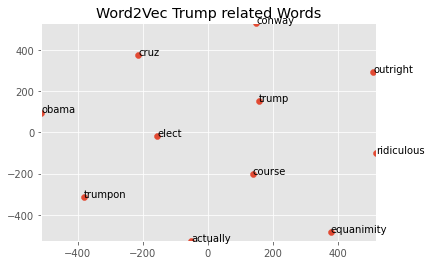

In [0]:
display_closestwords_tsnescatterplot(w2v_model, 'trump')


In [0]:
w2v_model.wv.most_similar("iran")

[('tehran', 0.8842542171478271),
 ('iranian', 0.7496998310089111),
 ('hezbollah', 0.6394436955451965),
 ('jcpoa', 0.6144747734069824),
 ('destabilizing', 0.6143420934677124),
 ('iranians', 0.6061540842056274),
 ('qatar', 0.6019567251205444),
 ('riyadh', 0.6014444231987),
 ('doha', 0.6006159782409668),
 ('khamenei', 0.5984948873519897)]

In [0]:
w2v_model.wv.most_similar("trump")

[('elect', 0.6392785310745239),
 ('cruz', 0.551868200302124),
 ('equanimity', 0.5407495498657227),
 ('trumpon', 0.535987377166748),
 ('conway', 0.4952229857444763),
 ('actually', 0.4857929050922394),
 ('course', 0.48514845967292786),
 ('obama', 0.48504215478897095),
 ('outright', 0.48315566778182983),
 ('ridiculous', 0.47930946946144104)]

In [0]:
# Tokenizing Text -> Repsesenting each word by a number
# Mapping of orginal word to number is preserved in word_index property of tokenizer

#Tokenized applies basic processing like changing it yo lower case, explicitely setting that as False
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [0]:
# lets check the first 10 words of first news
#every word has been represented with a number
X[0][:10]

[389, 395, 10495, 54, 5509, 1286, 4840, 315, 205, 16]

In [0]:
#Lets check few word to numerical replesentation
#Mapping is preserved in dictionary -> word_index property of instance
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 21:
        break 
      

trump -> 1
said -> 2
president -> 3
would -> 4
people -> 5
one -> 6
state -> 7
new -> 8
obama -> 9
also -> 10
clinton -> 11
house -> 12
donald -> 13
government -> 14
states -> 15
republican -> 16
year -> 17
white -> 18
could -> 19
told -> 20
united -> 21


In [0]:
print(X)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
print(len(X))

44897


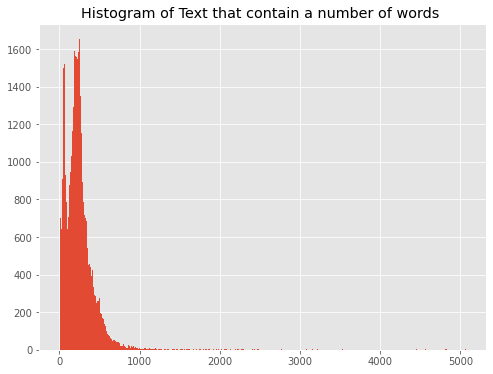

In [0]:
# For determining size of input...

# Making histogram for no of words in news shows that most news article are under 700 words.
# Lets keep each news small and truncate all news to 700 while tokenizing
plt.figure(figsize=(8,6))
plt.hist([len(x) for x in X], bins=500)
plt.title('Histogram of Text that contain a number of words ')
plt.show()

# Its heavily skewed. There are news with 5000 words? Lets truncate these outliers :) 

In [0]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 500])
# Out of 48k news, 42k have less than 500 words

41839

In [0]:
#Lets keep all news to 500, add padding to news with less than 500 words and truncating long ones
maxlen = 500

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [0]:

# 0 is not associated to any word, as mapping of words started from 1
# 0 will also be used later, if unknows word is encountered in test set
len(X[0])

500

In [0]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [0]:
vocab_size

122249

In [0]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [0]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, word_index)

In [0]:
print(embedding_vectors)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-4.35053635 -1.37722933 -1.61260128 ... -1.23749185 -0.45487747
  -1.65596247]
 [-0.97480702  2.05672646 -1.90692496 ...  0.27831793 -0.04492832
   1.40384328]
 ...
 [ 0.02040803  0.03084279  0.03146309 ...  0.03504612 -0.0261843
   0.00074886]
 [ 0.00057416 -0.00855438  0.01917638 ... -0.01223771 -0.02519854
  -0.00105698]
 [ 0.01082426 -0.01931897 -0.00665537 ... -0.00577785  0.00375191
   0.01526972]]


In [0]:
#Defining Neural Network
from tensorflow.keras.optimizers import SGD
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])



In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          12224900  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 12,342,277
Trainable params: 117,377
Non-trainable params: 12,224,900
_________________________________________________________________


In [0]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [0]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 67s 91ms/step - loss: 0.3006 - acc: 0.9034 - val_loss: 0.2414 - val_acc: 0.9192
Epoch 2/6
737/737 [==============================] - 66s 90ms/step - loss: 0.2578 - acc: 0.9160 - val_loss: 0.1748 - val_acc: 0.9564
Epoch 3/6
737/737 [==============================] - 66s 90ms/step - loss: 0.1272 - acc: 0.9655 - val_loss: 0.1050 - val_acc: 0.9676
Epoch 4/6
737/737 [==============================] - 66s 90ms/step - loss: 0.1445 - acc: 0.9600 - val_loss: 1.3308 - val_acc: 0.6746
Epoch 5/6
737/737 [==============================] - 66s 90ms/step - loss: 0.2496 - acc: 0.9220 - val_loss: 0.1808 - val_acc: 0.9638
Epoch 6/6
737/737 [==============================] - 67s 91ms/step - loss: 0.1236 - acc: 0.9641 - val_loss: 0.1153 - val_acc: 0.9749


In [0]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred = (model.predict(X_test) >= 0.5).astype("int")

In [0]:
accuracy_score(y_test, y_pred)

0.9765701559020045

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5914
           1       0.96      0.99      0.98      5311

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[5714,  200],
       [  63, 5248]])

[Text(0, 0.5, 'Rumor'), Text(0, 1.5, 'No Rumor')]

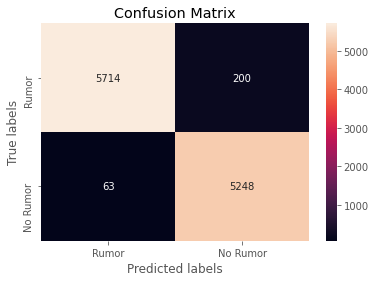

In [0]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt=".0f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Rumor', 'No Rumor']); ax.yaxis.set_ticklabels(['Rumor', 'No Rumor'])